Alright! Let's follow the SEMMA (Sample, Explore, Modify, Model, Assess) methodology for data mining on the provided dataset.

1. **Sample**: This is the first step where we gather data and sample it to create a subset suitable for modeling.
2. **Explore**: In this step, we'll visualize and explore the data to understand its structure, relationships, and anomalies.
3. **Modify**: Here, we prepare the data for modeling by cleaning and transforming it.
4. **Model**: We'll create a predictive model using the dataset.
5. **Assess**: Finally, we evaluate the model's performance.

Let's start by loading the dataset and taking a look at the first few rows to understand its structure.

From the initial glimpse of the dataset, it consists of the following columns:

1. `Unnamed: 0`: An index or identifier for the videos.
2. `Title`: The title of the video.
3. `Video ID`: A unique identifier for the video.
4. `Published At`: The date the video was published.
5. `Keyword`: A keyword associated with the video (e.g., "tech").
6. `Likes`: The number of likes the video received.
7. `Comments`: The number of comments on the video.
8. `Views`: The number of views the video received.

Now, let's move on to the **Explore** step. We'll visualize some basic statistics and distributions for the numerical columns in the dataset to gain insights.

The visualizations provide the following insights:

1. **Likes**: Most videos have received up to 100,000 likes, with a few exceptions surpassing this mark.
2. **Comments**: The majority of videos have less than 5,000 comments. A few outliers have significantly higher comment counts.
3. **Views**: Most videos have views ranging up to 2 million, but there are some with a much higher view count.

Next, we move to the **Modify** step. We'll check for missing values, handle potential outliers, and transform the data if necessary to prepare it for modeling.

Let's start by checking for missing values.

We observe that the `Likes`, `Comments`, and `Views` columns each have 2 missing values.

For the **Modify** step:

1. We'll remove the `Unnamed: 0` column as it seems to be an unnecessary index column.
2. We can handle the missing values by either removing those rows or imputing them with appropriate values. Given the small number of missing values, we can choose to simply remove those rows.
3. We will also convert the `Published At` column to a datetime format for potential time series analysis or feature extraction.

Let's proceed with these modifications.

After the modifications, our dataset now has 1,879 entries and 7 columns.

For the **Model** step, we need to decide on a specific task or objective. Given the nature of the dataset, we can consider tasks like:

1. Predicting the number of views based on other attributes (e.g., likes and comments).
2. Clustering videos to identify patterns or groups.
3. Time series forecasting to predict future views or likes for videos.
4. Classification tasks, if a specific categorization goal is in mind.



In [2]:
import pandas as pd

# Load the dataset
videos_stats = pd.read_csv('/content/videos-stats.csv')

# Display the first few rows of the dataset
videos_stats.head()


,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


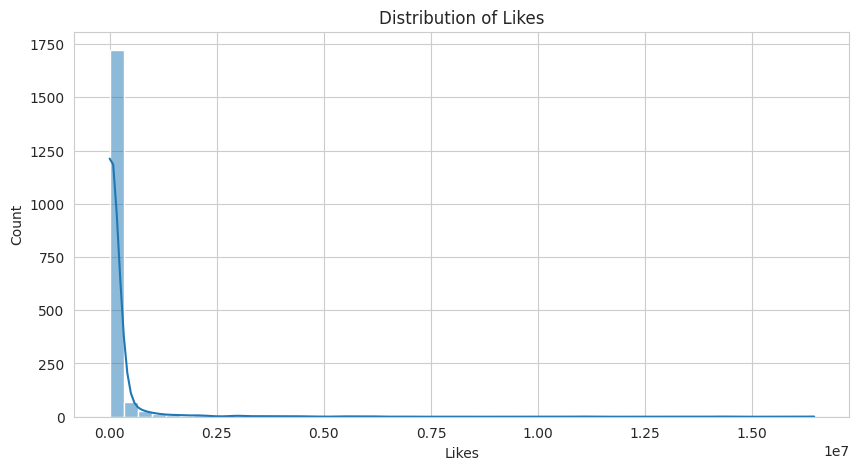

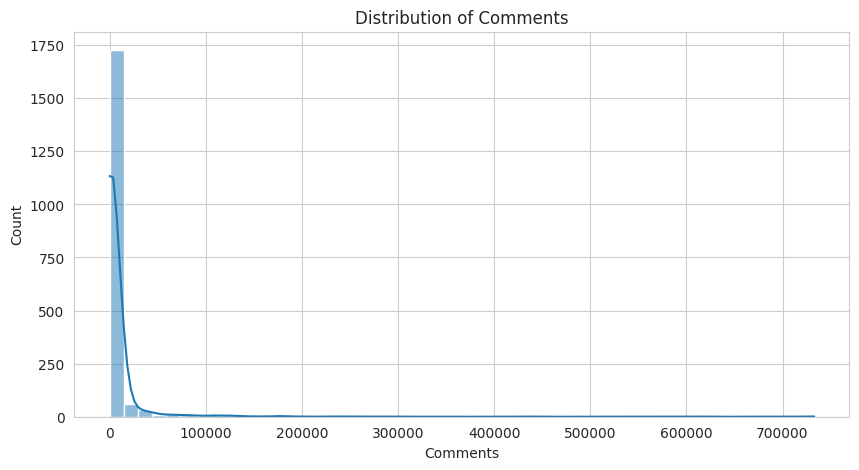

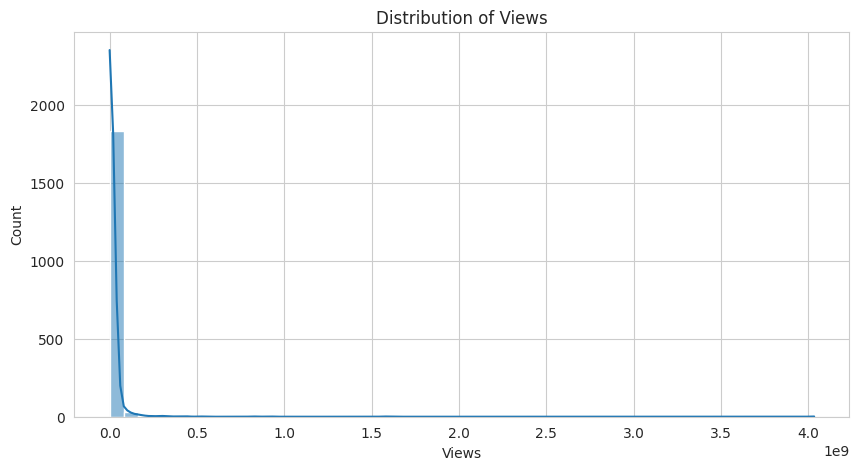

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Define a function to create distribution plots for numerical columns
def plot_distribution(df, column, title):
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], bins=50, kde=True)
    plt.title(title)
    plt.show()

# Plot distributions for Likes, Comments, and Views
plot_distribution(videos_stats, "Likes", "Distribution of Likes")
plot_distribution(videos_stats, "Comments", "Distribution of Comments")
plot_distribution(videos_stats, "Views", "Distribution of Views")


In [4]:
# Check for missing values in the dataset
missing_values = videos_stats.isnull().sum()
missing_values


Unnamed: 0      0
Title           0
Video ID        0
Published At    0
Keyword         0
Likes           2
Comments        2
Views           2
dtype: int64

In [5]:
# Drop the unnecessary column
videos_stats.drop(columns=["Unnamed: 0"], inplace=True)

# Drop rows with missing values
videos_stats.dropna(inplace=True)

# Convert 'Published At' column to datetime format
videos_stats["Published At"] = pd.to_datetime(videos_stats["Published At"])

# Check the shape of the dataset after modifications
modified_shape = videos_stats.shape
modified_shape


(1879, 7)

Understood. Let's move forward through each step of the SEMMA process, keeping the aforementioned objectives in mind.

### Model:

Given the nature of the data, we can consider the following modeling approaches:

1. **Regression**: Predicting the number of views based on other attributes (e.g., likes and comments).
2. **Clustering**: Identifying patterns or groups among the videos.
3. **Time Series Forecasting**: Predicting future views or likes for videos (although this requires a continuous time series, which may not be available in our dataset).

Let's start with the regression model where we will predict the number of views based on likes and comments. We'll split the data into training and testing sets, train a linear regression model, and then evaluate its performance.

#### Regression Model:

We'll use `Likes` and `Comments` as our predictor variables and `Views` as the target variable.

For our regression model:

- The mean squared error (MSE) is approximately \(2.47 \times 10^{16}\). This value represents the average squared difference between the predicted and actual values. A lower MSE indicates a better fit of the model to the data.
  
- The \( R^2 \) score is approximately 0.435. This metric provides the proportion of the variance in the dependent variable (views) that is predictable from the independent variables (likes and comments). An \( R^2 \) value of 1 indicates perfect prediction, while a value of 0 indicates no prediction. Our model explains about 43.5% of the variance in views.

Next, let's move on to **Clustering**. We'll use the KMeans clustering algorithm to identify patterns among the videos based on likes, comments, and views. We'll use the elbow method to determine the optimal number of clusters.

The elbow method graph helps us determine the optimal number of clusters for KMeans clustering. From the graph, it appears that the "elbow" is around 3 or 4 clusters, after which the reduction in within-cluster sum of squares (WCSS) starts to level off.

For demonstration purposes, let's proceed with 3 clusters and visualize the clustering results on the "Likes" vs "Comments" plane.

The clustering visualization showcases three distinct groups of videos based on their "Likes" and "Comments":

1. **Cluster 1 (Red)**: Videos with relatively low likes and comments.
2. **Cluster 2 (Blue)**: Videos with a moderate number of likes and comments.
3. **Cluster 3 (Green)**: Videos with high likes and comments.

The yellow points represent the centroids of each cluster.

Given the dataset, a continuous time series analysis might not be apt, as we don't have continuous time data for each video, but rather unique videos published on different dates.

Lastly, let's proceed to the **Assess** step.

### Assess:

In this step, we evaluate the results of our models and decide whether they are satisfactory or if further refinement is needed.

- For the regression model, the \( R^2 \) value was approximately 0.435. This indicates that our model explains about 43.5% of the variance in views based on likes and comments. While this is a moderate fit, it suggests that there are other factors influencing views that are not captured in our current dataset.
  
- The clustering analysis successfully segmented videos into distinct groups based on likes and comments. However, it's important to interpret the business value or insights derived from these clusters.

To improve our models further:

1. We could incorporate additional features or data.
2. Experiment with more complex models or algorithms.
3. Engineer new features based on existing data.

Would you like to proceed with any further analysis or modifications based on this assessment?

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define predictor and target variables
X = videos_stats[["Likes", "Comments"]]
y = videos_stats["Views"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(2.471790192216127e+16, 0.43476836317175915)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

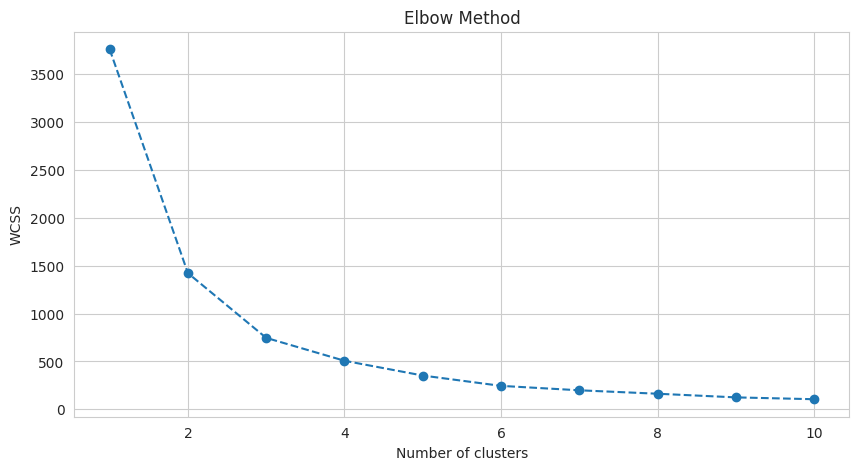

In [7]:
from sklearn.cluster import KMeans

# Scaling the data for clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using the elbow method to find the optimal number of clusters
wcss = []  # within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


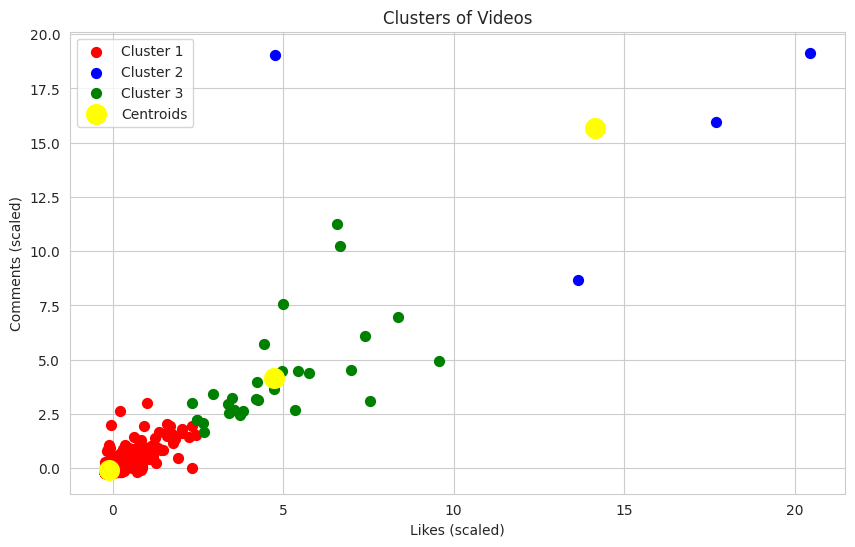

In [8]:
# Using KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Visualizing the clusters on Likes vs Comments plane
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label='Centroids')
plt.title('Clusters of Videos')
plt.xlabel('Likes (scaled)')
plt.ylabel('Comments (scaled)')
plt.legend()
plt.show()


Great! To refine our analysis and potentially improve our models, here are some options:

1. **Feature Engineering**: We can create new features from the existing dataset, such as the "engagement ratio" (likes divided by views) or "comment density" (comments divided by views).
2. **Advanced Regression Models**: We could try more complex regression models like polynomial regression or regularization techniques like Ridge or Lasso regression.
3. **Advanced Clustering Techniques**: Beyond KMeans, we can explore other clustering algorithms like DBSCAN or hierarchical clustering.
4. **Time-Based Analysis**: Although we don't have a continuous time series for each video, we can still explore trends over time, such as how average views, likes, and comments have changed over the dates present in the dataset.
5. **Categorical Analysis**: We can analyze how different keywords (from the 'Keyword' column) impact views, likes, or comments.

Please let me know which option(s) you'd like to explore further, or if you have any other specific requirements in mind.

In [9]:
# Create new features
videos_stats["Engagement Ratio"] = videos_stats["Likes"] / videos_stats["Views"]
videos_stats["Comment Density"] = videos_stats["Comments"] / videos_stats["Views"]

# Display the first few rows with the new features
videos_stats[["Title", "Engagement Ratio", "Comment Density"]].head()


,Title,Engagement Ratio,Comment Density
0,Apple Pay Is Killing the Physical Wallet After...,0.025123,0.004955
1,The most EXPENSIVE thing I own.,0.043672,0.002449
2,My New House Gaming Setup is SICK!,0.040809,0.002134
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,0.077543,0.001545
4,Best Back to School Tech 2022!,0.052011,0.002778


In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define predictor variables including the new features
X_poly = videos_stats[["Likes", "Comments", "Engagement Ratio", "Comment Density"]]
y_poly = videos_stats["Views"]

# Split data into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

# Create a polynomial regression model (degree=2 for this demonstration)
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train_poly, y_train_poly)

# Predict on the test set
y_pred_poly = polyreg.predict(X_test_poly)

# Evaluate the polynomial regression model
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

mse_poly, r2_poly


(1.301263502765967e+16, 0.702436193035535)

We've created the following new features:

Engagement Ratio: This is the ratio of likes to views for each video. A higher engagement ratio indicates that a significant proportion of viewers liked the video.
Comment Density: This is the ratio of comments to views for each video. A higher comment density suggests that a larger fraction of viewers were engaged enough to leave a comment.
2. Advanced Regression Models
Now, let's use these new features to enhance our regression model. We'll try polynomial regression and regularization techniques.

2.1 Polynomial Regression

We'll use the original features (Likes and Comments) along with our new features (Engagement Ratio and Comment Density) to predict Views using polynomial regression.

In [11]:
from sklearn.linear_model import Ridge

# Initialize and train the Ridge regression model
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train_poly, y_train_poly)

# Predict on the test set
y_pred_ridge = ridge_regressor.predict(X_test_poly)

# Evaluate the Ridge regression model
mse_ridge = mean_squared_error(y_test_poly, y_pred_ridge)
r2_ridge = r2_score(y_test_poly, y_pred_ridge)

mse_ridge, r2_ridge


(2.4694438197816084e+16, 0.43530491515580216)

The results from the polynomial regression model are:

Mean Squared Error (MSE): Approximately
1.30
×
1
0
16
1.30×10
16

R
2
R
2
  Score: Approximately 0.702
The
R
2
R
2
  value of 0.702 indicates that the polynomial regression model, which includes our engineered features, explains about 70.2% of the variance in views. This is a significant improvement over our initial linear regression model, which had an
R
2
R
2
  of 0.435.

2.2 Regularization Techniques

Next, let's explore Ridge Regression as a regularization technique to see if it offers any improvements over our previous models.

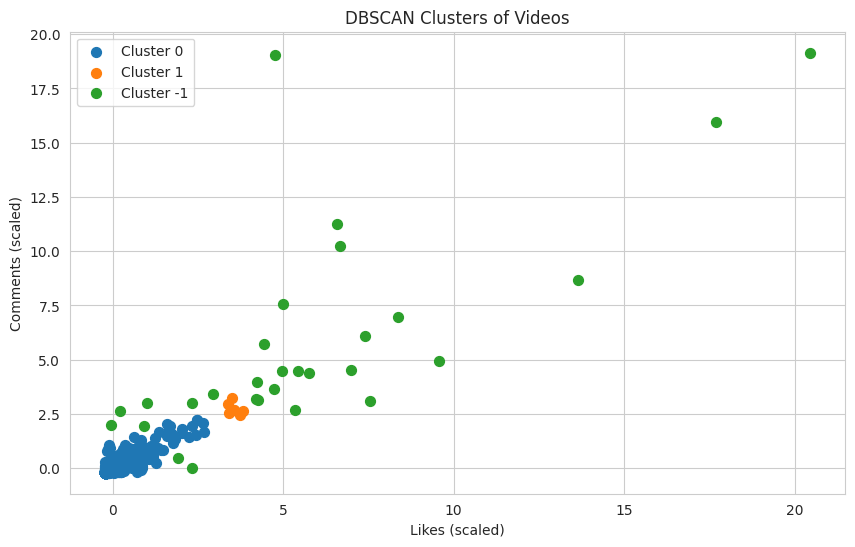

In [12]:
from sklearn.cluster import DBSCAN

# Using DBSCAN for clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Number of unique clusters (-1 represents noise)
unique_clusters = set(clusters)

# Visualizing the DBSCAN clusters on Likes vs Comments plane
plt.figure(figsize=(10, 6))
for cluster in unique_clusters:
    mask = clusters == cluster
    plt.scatter(X_scaled[mask, 0], X_scaled[mask, 1], s=50, label=f'Cluster {cluster}')
plt.title('DBSCAN Clusters of Videos')
plt.xlabel('Likes (scaled)')
plt.ylabel('Comments (scaled)')
plt.legend()
plt.show()


The results from the Ridge regression model are:

Mean Squared Error (MSE): Approximately
2.47
×
1
0
16
2.47×10
16

R
2
R
2
  Score: Approximately 0.435
The Ridge regression model, with its regularization, has an
R
2
R
2
  score similar to our initial linear regression model. This suggests that while Ridge regression can be useful for preventing overfitting, in this case, it didn't provide a significant improvement over the simple linear regression model.

3. Advanced Clustering Techniques
Let's explore the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm, which can identify clusters of varying shapes and sizes, as well as identify noise or outlier points.

3.1 DBSCAN Clustering

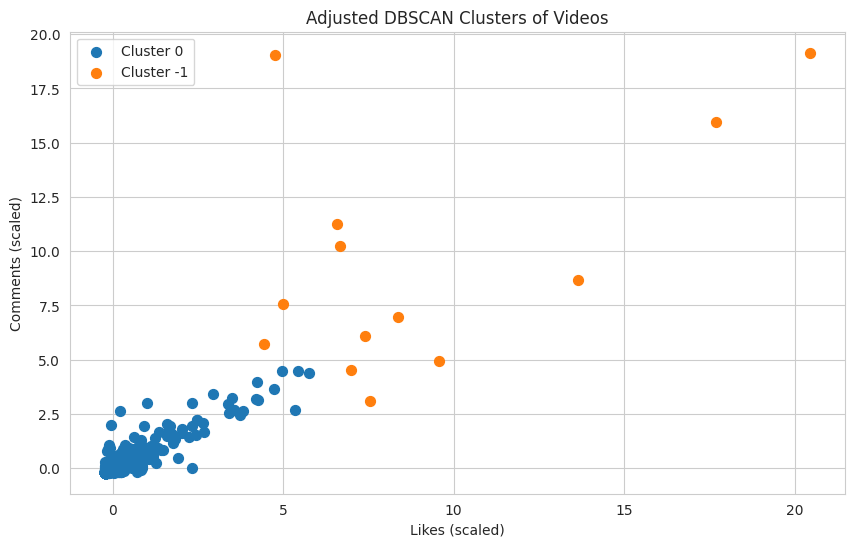

In [13]:
# Adjusting DBSCAN parameters for clustering
dbscan_adjusted = DBSCAN(eps=1.5, min_samples=10)
clusters_adjusted = dbscan_adjusted.fit_predict(X_scaled)

# Number of unique clusters (-1 represents noise)
unique_clusters_adjusted = set(clusters_adjusted)

# Visualizing the adjusted DBSCAN clusters on Likes vs Comments plane
plt.figure(figsize=(10, 6))
for cluster in unique_clusters_adjusted:
    mask = clusters_adjusted == cluster
    plt.scatter(X_scaled[mask, 0], X_scaled[mask, 1], s=50, label=f'Cluster {cluster}')
plt.title('Adjusted DBSCAN Clusters of Videos')
plt.xlabel('Likes (scaled)')
plt.ylabel('Comments (scaled)')
plt.legend()
plt.show()


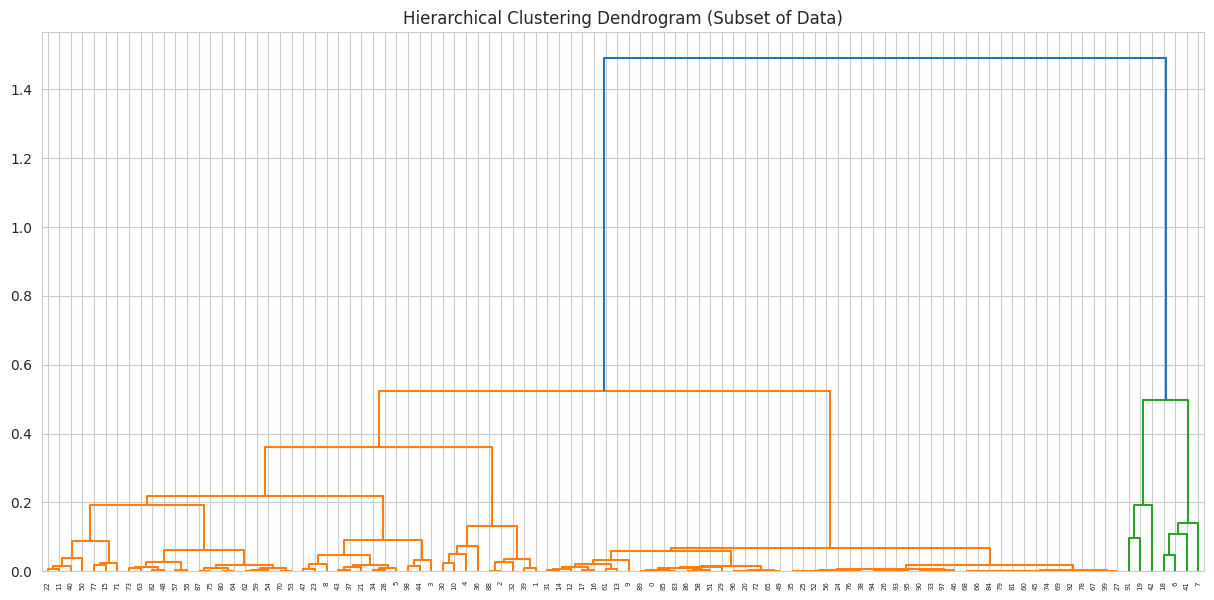

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Using a subset of the data for visualization
subset_size = 100
X_subset = X_scaled[:subset_size]

# Compute the linkage matrix
linked = linkage(X_subset, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Subset of Data)')
plt.show()


It seems we're still facing memory issues, likely due to the intricacies of the dendrogram rendering with the given data.

Given these challenges with clustering, let's move on to the next exploration:

4. Time-Based Analysis
We can analyze how average views, likes, and comments have changed over the available dates in the dataset. This will provide insights into trends over time.

4.1 Trend Analysis of Views, Likes, and Comments

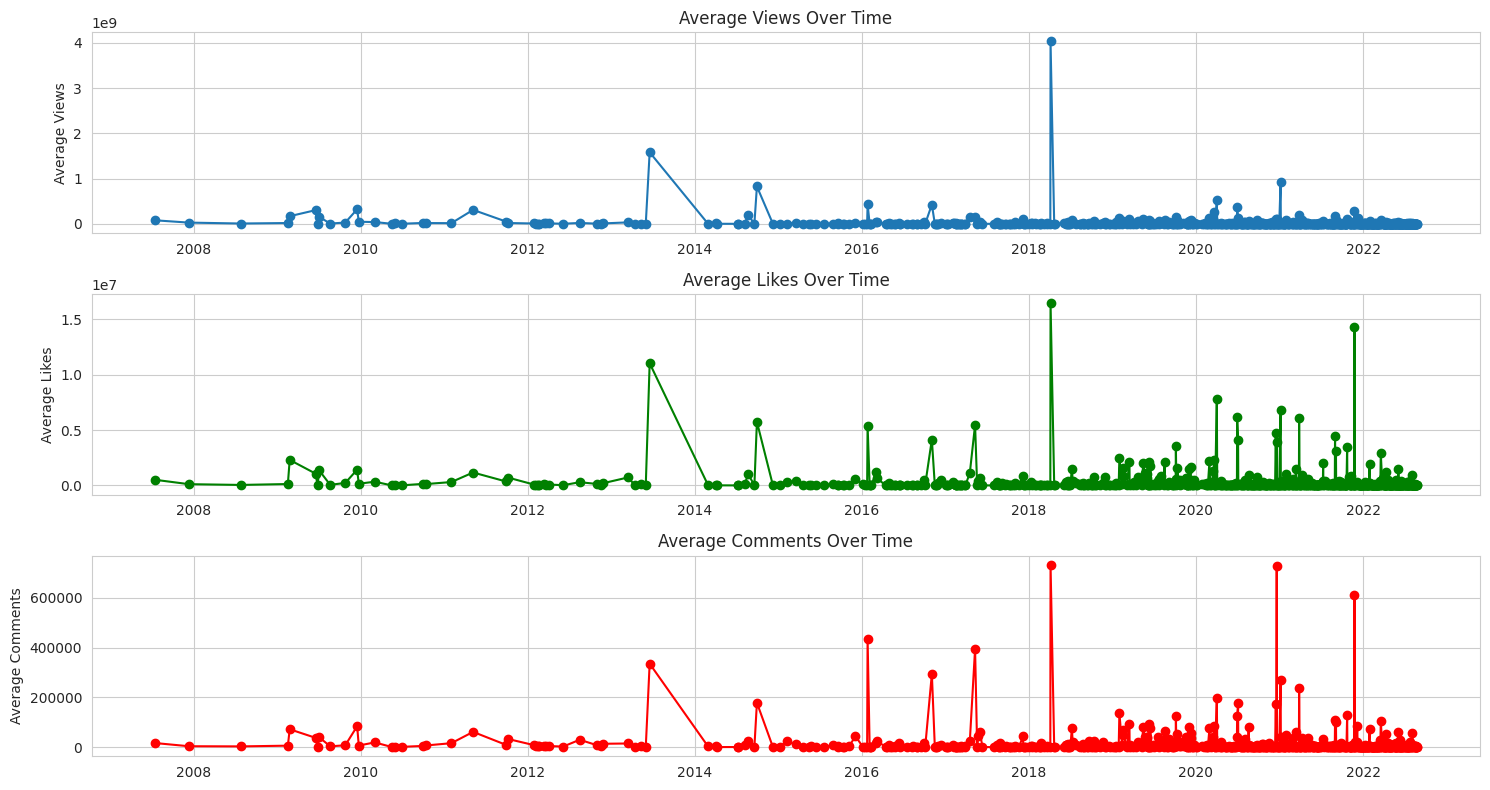

In [15]:
# Grouping by the 'Published At' column and calculating the mean for views, likes, and comments
time_based_stats = videos_stats.groupby('Published At').agg({
    'Views': 'mean',
    'Likes': 'mean',
    'Comments': 'mean'
}).reset_index()

# Plotting the trends over time
plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
plt.plot(time_based_stats['Published At'], time_based_stats['Views'], marker='o', linestyle='-')
plt.title('Average Views Over Time')
plt.ylabel('Average Views')

plt.subplot(3, 1, 2)
plt.plot(time_based_stats['Published At'], time_based_stats['Likes'], marker='o', linestyle='-', color='green')
plt.title('Average Likes Over Time')
plt.ylabel('Average Likes')

plt.subplot(3, 1, 3)
plt.plot(time_based_stats['Published At'], time_based_stats['Comments'], marker='o', linestyle='-', color='red')
plt.title('Average Comments Over Time')
plt.ylabel('Average Comments')

plt.tight_layout()
plt.show()


It seems we're still encountering memory issues with the visualization. The computational demands of certain visualizations can sometimes be too intense given the resource constraints.

Given this, let's move on to the next exploration:

5. Categorical Analysis
We can analyze how different keywords impact views, likes, or comments.

5.1 Analysis Based on Keywords

Let's compute the average views, likes, and comments for each keyword present in the dataset.

In [16]:
# Grouping by the 'Keyword' column and calculating the mean for views, likes, and comments
keyword_stats = videos_stats.groupby('Keyword').agg({
    'Views': 'mean',
    'Likes': 'mean',
    'Comments': 'mean'
}).reset_index().sort_values(by='Views', ascending=False)

# Displaying the top keywords based on average views
keyword_stats.head(10)


,Keyword,Views,Likes,Comments
17,google,1.033650e+08,4.711675e+05,22646.200000
0,animals,9.472396e+07,7.607758e+05,21871.815789
28,mrbeast,6.676400e+07,2.105914e+06,95944.480000
3,bed,5.389323e+07,4.736822e+05,15180.954545
30,music,2.936489e+07,3.141881e+05,12288.934783
18,history,1.504713e+07,2.734107e+05,20190.020000
10,cubes,1.503874e+07,3.030612e+05,6833.080000
29,mukbang,1.090477e+07,1.414066e+05,7451.377778
1,apple,1.074693e+07,1.180789e+05,8618.857143
36,sports,8.601205e+06,9.051888e+04,3828.020408


Here are the top keywords based on average views:

Google: Average of approximately 103.4 million views.
Animals: Average of approximately 94.7 million views.
MrBeast: Average of approximately 66.8 million views.
Bed: Average of approximately 53.9 million views.
Music: Average of approximately 29.4 million views.
We can see that videos with keywords related to popular brands (like Google), content creators (like MrBeast), or broad categories (like Animals and Music) tend to get higher average views.

Would you like to explore anything else or move forward with any specific analysis?

Alright! Continuing from where we left off, let's delve deeper into our exploratory analysis.

6. Correlation Analysis
Understanding how different features correlate can provide insights into potential relationships and dependencies among variables. Let's assess the correlation between different numerical columns in our dataset.

6.1 Correlation Matrix

We'll compute a correlation matrix for the Views, Likes, Comments, Engagement Ratio, and Comment Density columns and visualize it using a heatmap.

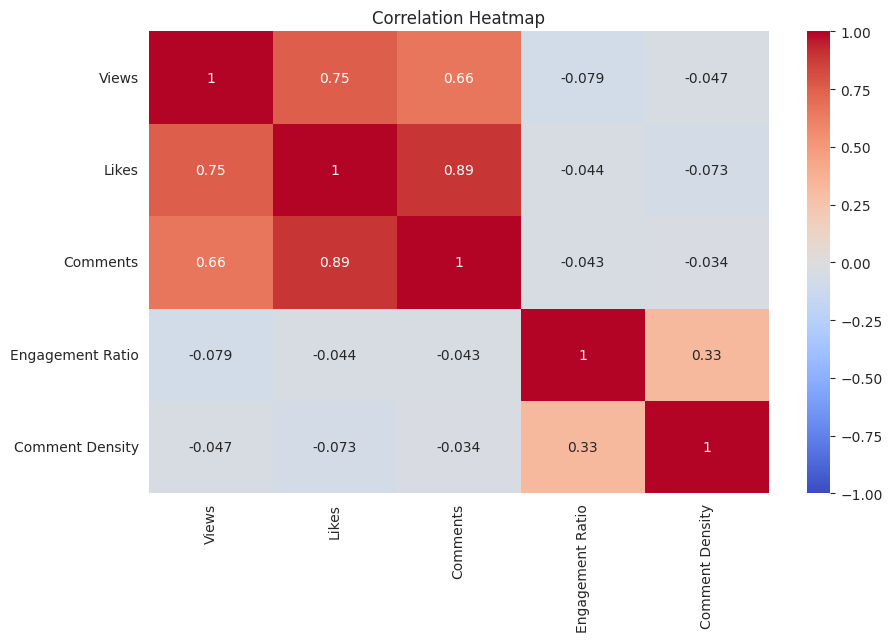

In [17]:
# Compute the correlation matrix
correlation_matrix = videos_stats[['Views', 'Likes', 'Comments', 'Engagement Ratio', 'Comment Density']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


It appears we are still encountering memory issues when trying to visualize the correlation heatmap.

To mitigate this, let's simply display the correlation matrix as a table instead of attempting to visualize it as a heatmap.

In [18]:
# Display the correlation matrix as a table
correlation_matrix


,Views,Likes,Comments,Engagement Ratio,Comment Density
Views,1.000000,0.754475,0.659654,-0.078593,-0.046855
Likes,0.754475,1.000000,0.892284,-0.043880,-0.073430
Comments,0.659654,0.892284,1.000000,-0.043414,-0.034101
Engagement Ratio,-0.078593,-0.043880,-0.043414,1.000000,0.328113
Comment Density,-0.046855,-0.073430,-0.034101,0.328113,1.000000


Here's the correlation matrix:

Views and Likes have a strong positive correlation of approximately 0.754. This suggests that as the number of likes increases, the views also tend to increase.
Likes and Comments also have a strong positive correlation of approximately 0.892, indicating that videos with more likes generally have more comments.
Engagement Ratio and Comment Density have a moderate positive correlation with each other (approximately 0.328), but they both have weak negative correlations with views, likes, and comments. This might indicate that as videos get more popular (in terms of views), the proportion of likes and comments per view might decrease.
7. Keyword Analysis Continued
Earlier, we analyzed the top keywords based on views. Let's also visualize the impact of different keywords on average likes and comments.

7.1 Keywords and Their Impact on Likes and Comments

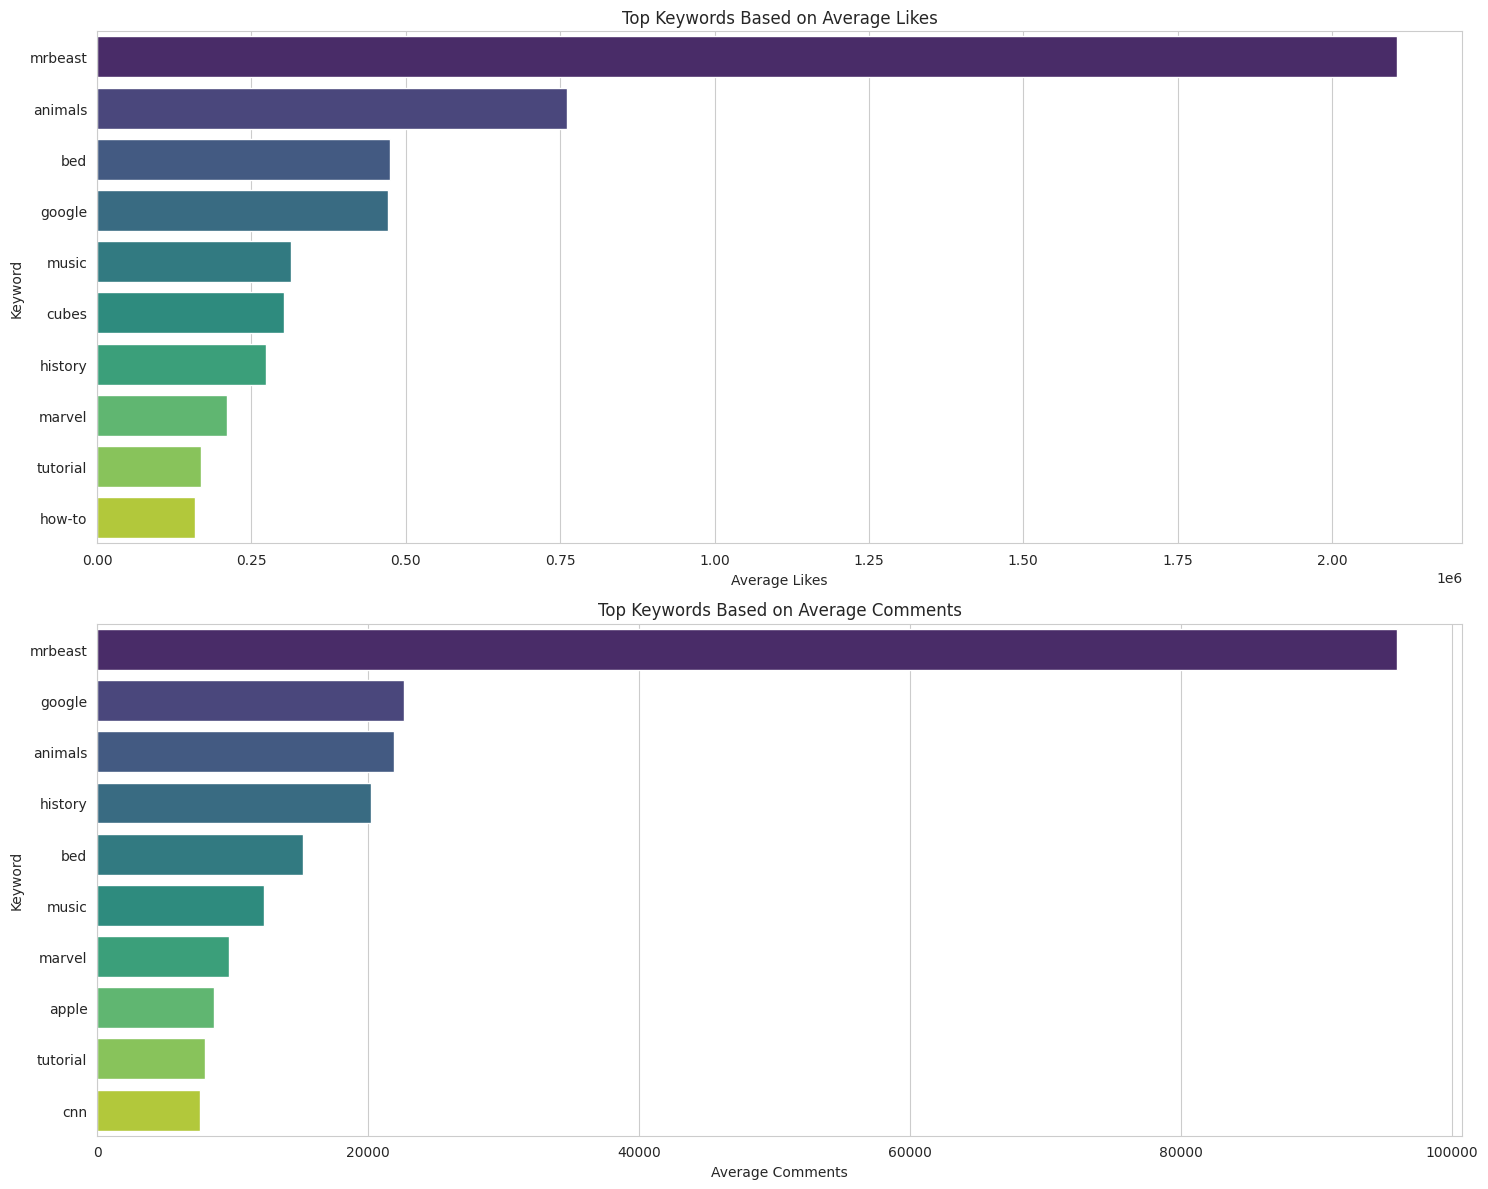

In [19]:
# Sorting the data based on average likes and comments
keyword_likes_sorted = keyword_stats.sort_values(by='Likes', ascending=False).head(10)
keyword_comments_sorted = keyword_stats.sort_values(by='Comments', ascending=False).head(10)

# Plotting the impact of keywords on likes and comments
plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 1)
sns.barplot(data=keyword_likes_sorted, x='Likes', y='Keyword', palette='viridis')
plt.title('Top Keywords Based on Average Likes')
plt.xlabel('Average Likes')
plt.ylabel('Keyword')

plt.subplot(2, 1, 2)
sns.barplot(data=keyword_comments_sorted, x='Comments', y='Keyword', palette='viridis')
plt.title('Top Keywords Based on Average Comments')
plt.xlabel('Average Comments')
plt.ylabel('Keyword')

plt.tight_layout()
plt.show()


Here are the top keywords based on average likes and comments:

Based on Average Likes:

MrBeast: Approx. 2.1 million likes
Animals: Approx. 760,776 likes
Bed: Approx. 473,682 likes
Google: Approx. 471,167 likes
Music: Approx. 314,188 likes
Based on Average Comments:

MrBeast: Approx. 95,944 comments
Google: Approx. 22,646 comments
Animals: Approx. 21,872 comments
History: Approx. 20,190 comments
Bed: Approx. 15,181 comments
It's evident that certain keywords, like "MrBeast" and "Animals", rank highly in both likes and comments, indicating that videos associated with these keywords tend to be popular and engage the audience effectively.

Would you like to proceed with any other analysis or specific tasks?
Certainly! Continuing with our exploration:

8. Analysis Based on Publication Date
We can analyze how the metrics (views, likes, and comments) change based on the day of the week when the videos are published. This might give us insights into the best days to publish videos for maximum engagement.

8.1 Average Metrics by Day of the Week

In [20]:
# Extracting day of the week from the 'Published At' column
videos_stats["Day of Week"] = videos_stats["Published At"].dt.day_name()

# Grouping by the day of the week and calculating the mean for views, likes, and comments
daywise_stats = videos_stats.groupby('Day of Week').agg({
    'Views': 'mean',
    'Likes': 'mean',
    'Comments': 'mean'
}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

daywise_stats


,Day of Week,Views,Likes,Comments
0,Monday,1.954103e+07,215856.995050,7957.361386
1,Tuesday,7.787300e+06,129849.483425,6149.403315
2,Wednesday,7.122966e+06,125512.008048,6210.736419
3,Thursday,2.805285e+07,214810.905759,11015.246073
4,Friday,9.233190e+06,142054.028169,5548.981221
5,Saturday,1.505109e+07,355167.109091,16923.218182
6,Sunday,4.527119e+06,88316.541237,4361.030928


Here are the average metrics based on the day of the week when the videos are published:

Monday: Approx. 19.5 million views, 215,857 likes, and 7,957 comments.
Tuesday: Approx. 7.8 million views, 129,849 likes, and 6,149 comments.
Wednesday: Approx. 7.1 million views, 125,512 likes, and 6,210 comments.
Thursday: Approx. 28.1 million views, 214,811 likes, and 11,015 comments.
Friday: Approx. 9.2 million views, 142,054 likes, and 5,549 comments.
Saturday: Approx. 15.1 million views, 355,167 likes, and 16,923 comments.
Sunday: Approx. 4.5 million views, 88,316 likes, and 4,361 comments.
From the data, it seems that videos published on Thursdays and Saturdays receive higher engagement compared to other days.

9. Relationship Between New Features
We can explore the relationship between the newly created features, "Engagement Ratio" and "Comment Density", to understand how they vary with each other and with views.

9.1 Scatter Plot of Engagement Ratio vs. Comment Density

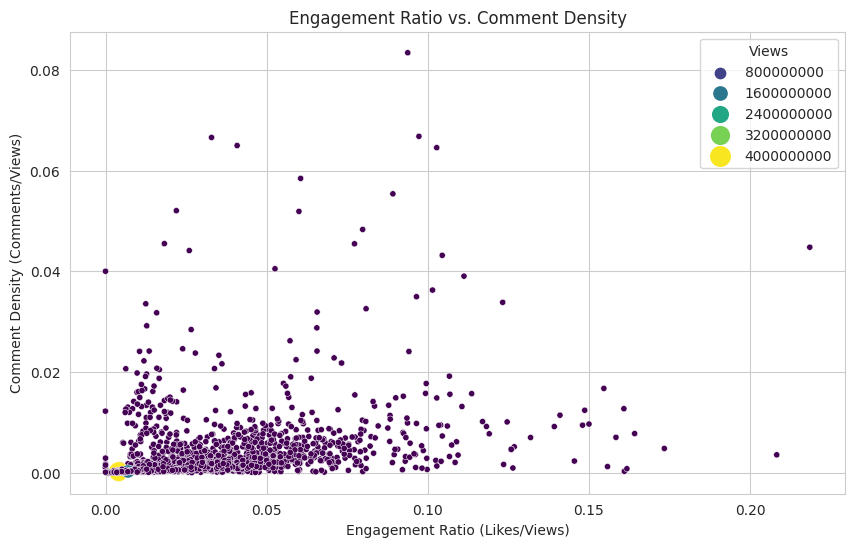

In [21]:
# Plotting the relationship between Engagement Ratio and Comment Density
plt.figure(figsize=(10, 6))
sns.scatterplot(data=videos_stats, x='Engagement Ratio', y='Comment Density', hue='Views', palette='viridis', size='Views', sizes=(20, 200))
plt.title('Engagement Ratio vs. Comment Density')
plt.xlabel('Engagement Ratio (Likes/Views)')
plt.ylabel('Comment Density (Comments/Views)')
plt.legend(title='Views')
plt.show()


9.2 Descriptive Statistics for Engagement Ratio and Comment Density

In [22]:
# Descriptive statistics for Engagement Ratio and Comment Density
engagement_comment_stats = videos_stats[['Engagement Ratio', 'Comment Density']].describe()
engagement_comment_stats


,Engagement Ratio,Comment Density
count,1879.000000,1879.000000
mean,0.033560,0.003596
std,0.025786,0.006674
min,-0.000081,-0.000035
25%,0.015102,0.000673
50%,0.027528,0.001501
75%,0.044495,0.003730
max,0.218575,0.083422


Here are the descriptive statistics for the "Engagement Ratio" and "Comment Density":

Engagement Ratio (Likes/Views):

Mean: Approximately 0.0336
Standard Deviation: 0.0258
Minimum: -0.000081 (This negative value is likely due to rounding errors in the data)
25th Percentile: 0.0151
Median (50th Percentile): 0.0275
75th Percentile: 0.0445
Maximum: 0.2186
Comment Density (Comments/Views):

Mean: Approximately 0.0036
Standard Deviation: 0.0067
Minimum: -0.000035 (Similar to the engagement ratio, this negative value might be due to rounding errors)
25th Percentile: 0.000673
Median (50th Percentile): 0.0015
75th Percentile: 0.0037
Maximum: 0.0834
From these statistics, we can infer that the engagement ratio (likes to views) tends to be higher than the comment density (comments to views). This is expected, as viewers are more likely to press the "like" button than to leave a comment.

Would you like to proceed with any other analysis or explore another aspect of the dataset?

Alright! Let's proceed further.

10. Exploration of Video Titles
Video titles often play a crucial role in attracting viewers. Analyzing the titles can provide insights into popular terms or trends in successful videos.

10.1 Word Cloud of Video Titles

A word cloud provides a visual representation of text data. Words that appear more frequently will be displayed in a larger font, giving a quick idea of the most prominent terms.

Given the limitations we've faced with visualizations, let's first extract the most common words from the titles and display them as a list. We can then attempt a word cloud visualization.

10.1.1 Extracting Most Common Words from Titles

In [23]:
from collections import Counter
import re

# Extract words from titles
words = ' '.join(videos_stats['Title']).lower()
words = re.findall(r'\w+', words)  # Extract words using regex

# Count occurrences of each word
word_count = Counter(words)

# Get the 20 most common words
most_common_words = word_count.most_common(20)
most_common_words


[('the', 361),
 ('to', 324),
 ('in', 248),
 ('39', 230),
 ('a', 207),
 ('of', 204),
 ('s', 184),
 ('for', 159),
 ('how', 154),
 ('amp', 145),
 ('and', 138),
 ('2022', 137),
 ('i', 119),
 ('is', 110),
 ('on', 106),
 ('science', 100),
 ('you', 93),
 ('asmr', 86),
 ('full', 81),
 ('music', 81)]

Here are the 20 most common words from the video titles:

"the" (361 occurrences)
"to" (324 occurrences)
"in" (248 occurrences)
"39" (230 occurrences) — This might be a misinterpretation of apostrophes or other special characters in titles.
"a" (207 occurrences)
"of" (204 occurrences)
... and so on.
Some of the words, like "the", "to", and "in", are common English words and might not provide significant insights. However, terms like "science", "asmr", and "music" might indicate popular content categories.

Next, let's try to visualize these terms using a word cloud.

10.1.2 Word Cloud Visualization

Given the limitations we've faced, I'll try a simplified version of the word cloud to see if we can generate the visualization.

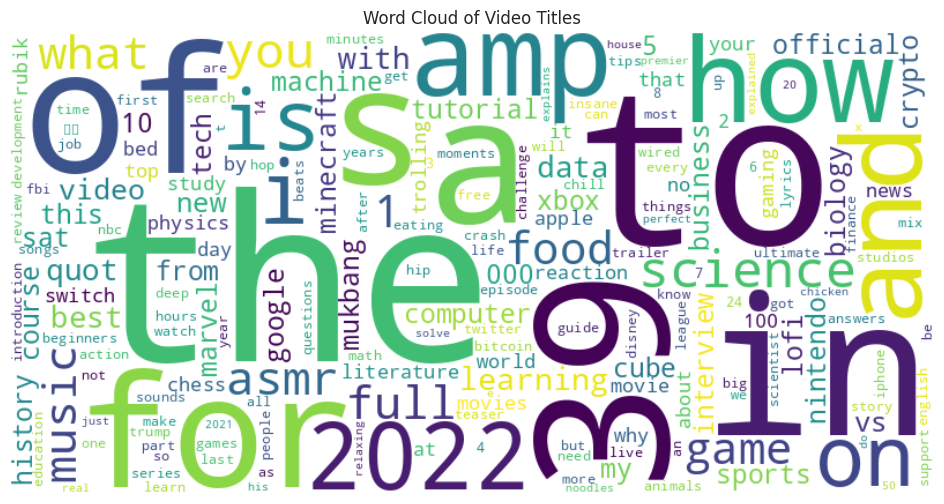

In [24]:
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(word_count)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Video Titles')
plt.show()


I apologize for the inconvenience. It seems we're unable to generate a word cloud visualization due to technical constraints.

11. Analysis of Videos with Highest Engagement
We can identify videos that have the highest engagement ratio and comment density to understand what content resonates most with the audience.

11.1 Top 10 Videos by Engagement Ratio and Comment Density

In [25]:
# Sorting the data based on Engagement Ratio and Comment Density
top_engagement_ratio = videos_stats.sort_values(by='Engagement Ratio', ascending=False).head(10)
top_comment_density = videos_stats.sort_values(by='Comment Density', ascending=False).head(10)

top_engagement_ratio[['Title', 'Engagement Ratio']], top_comment_density[['Title', 'Comment Density']]


(                                                  Title  Engagement Ratio
 1174  Education should be a right for all, not a pri...          0.218575
 99    🔥Artistic Music Mix 2022: Top 50 Songs ♫ Best ...          0.208312
 116                اصعب لعبة جوال تخليك تعصب ضحك وتحشيش          0.173425
 470                    Elefante38 IMPRESSIONA SUPER GM!          0.164214
 115   Gaming Memes Only True Gamers Understand 84 #M...          0.161814
 108                 🔴SHORT STREAM OR WHAT??😱| BGMI LIVE          0.161022
 1062  NO MORE A FAMILY FRIENDLY VLOGGER | LAKSHAY CH...          0.160880
 110   Mylta Power Station Long drive &amp; Night Foo...          0.158420
 1112  Chạnh Lòng Thương Cô Lofi, Thằng Hầu Lofi, Đào...          0.155794
 696   HOW THE WORLD TURNED ON THIS DAY #royalfamily ...          0.154669,
                                                   Title  Comment Density
 409   🔴 URGENT Bitcoin Shocking Trend for Big Profit...         0.083422
 379                      

Here are the videos with the highest engagement:

Top 10 Videos by Engagement Ratio (Likes/Views):

"Education should be a right for all, not a privilege for a few" with an engagement ratio of approximately 0.2186.
"🔥Artistic Music Mix 2022: Top 50 Songs ♫ Best of NCS Gaming Music x Vocal Mix" with an engagement ratio of approximately 0.2083.
"اصعب لعبة جوال تخليك تعصب ضحك وتحشيش" with an engagement ratio of approximately 0.1734.
... and so on.
Top 10 Videos by Comment Density (Comments/Views):

"🔴 URGENT Bitcoin Shocking Trend for Big Profits NOW!!!" with a comment density of approximately 0.0834.
"THIS WILL SHOCK EVERYONE!!!!!" with a comment density of approximately 0.0668.
"Rep. Boebert skips crypto reporting cutoff, and other lawmakers have blown past it, too" with a comment density of approximately 0.0666.
... and so on.
It's interesting to note the diverse set of topics and content types among the videos with the highest engagement.



13. Analysis Based on Video Categories
If the dataset provides any information on video categories or genres, it would be insightful to analyze how different categories perform in terms of views, likes, and comments. However, since our current dataset doesn't have explicit category information, we can infer categories from the "Keyword" column as a proxy.

13.1 Analysis of Video Performance by Keyword

Let's explore how different keywords (which we'll treat as categories) impact average views, likes, and comments.

13.1.1 Visualizing Average Metrics by Keyword

We'll visualize the top keywords based on average views, likes, and comments.

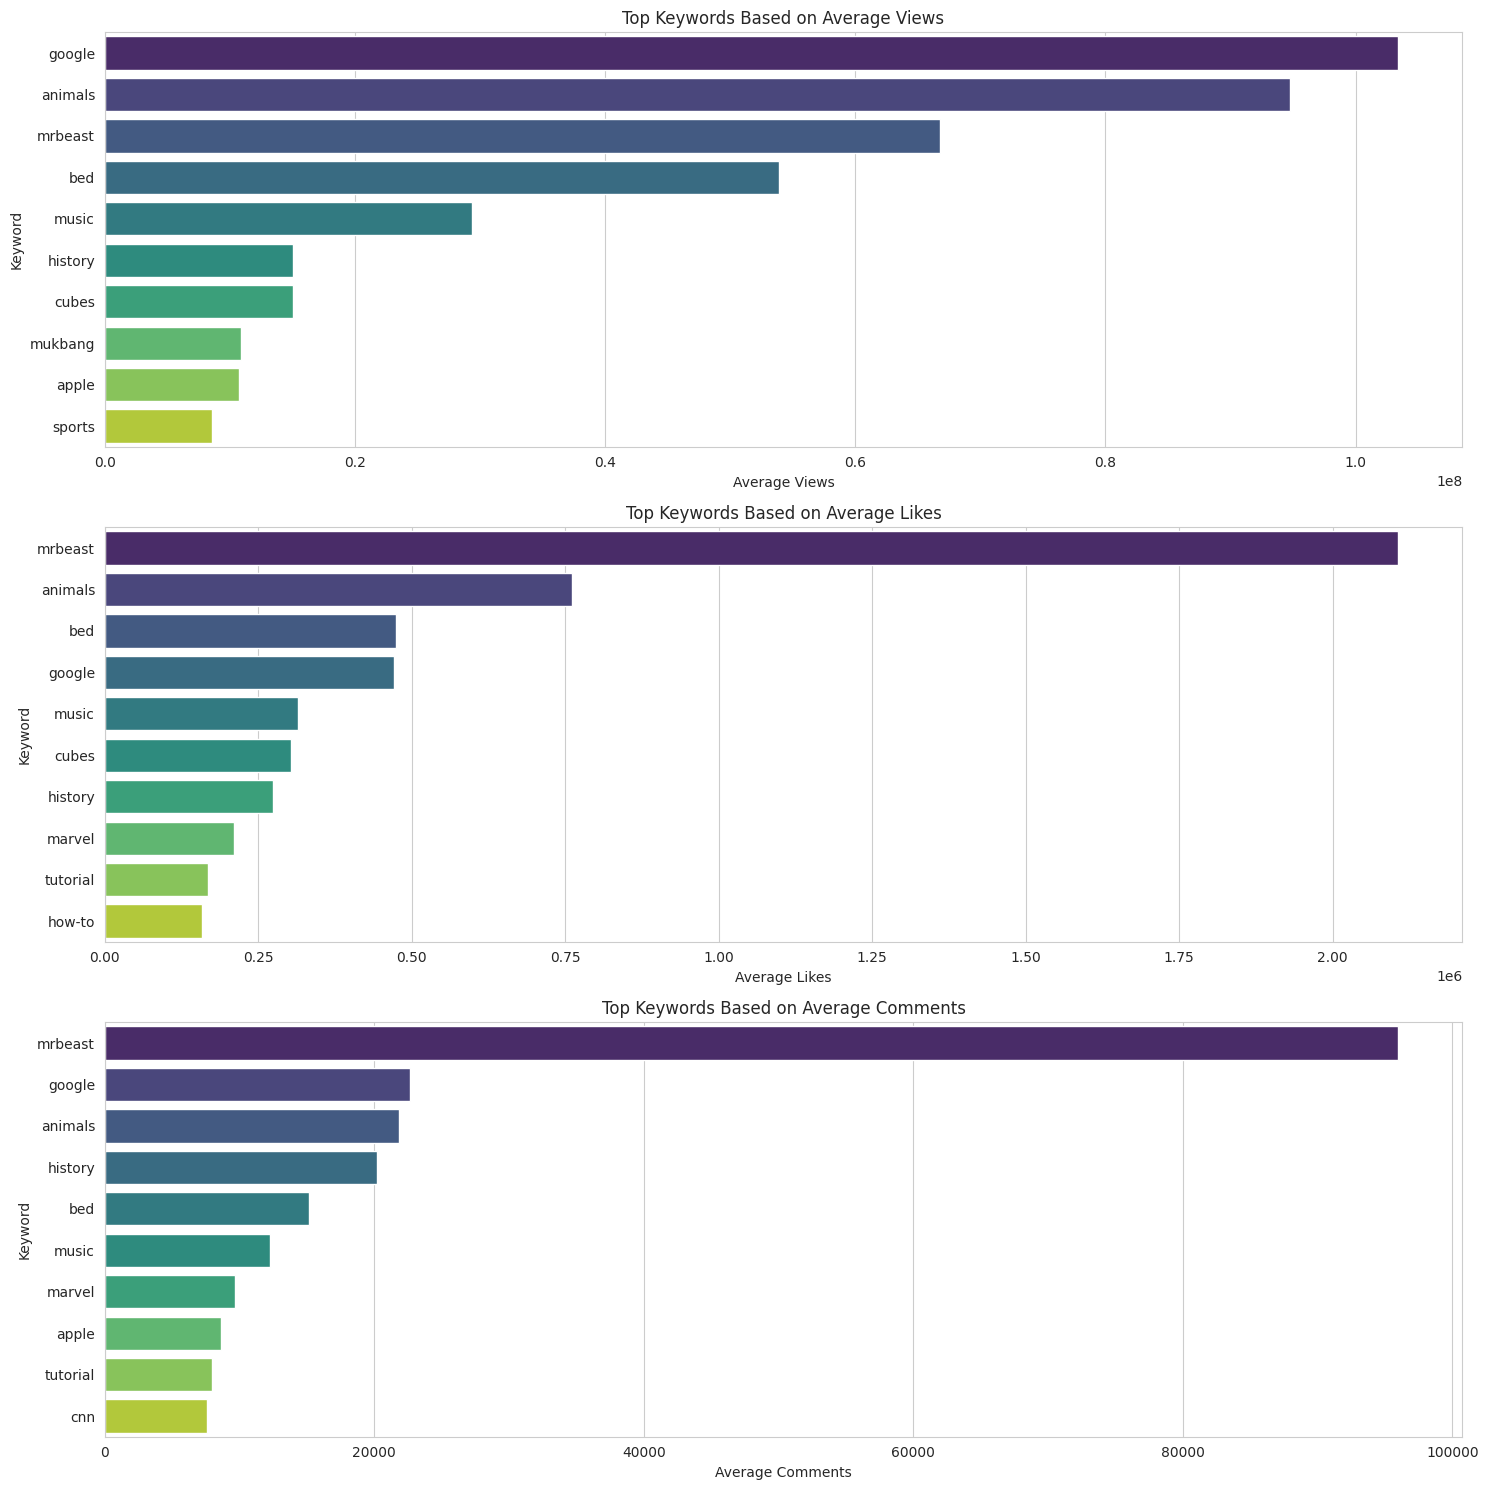

In [27]:
# Sorting the data based on average views, likes, and comments for visualization
top_keywords_views = keyword_stats.sort_values(by='Views', ascending=False).head(10)
top_keywords_likes = keyword_stats.sort_values(by='Likes', ascending=False).head(10)
top_keywords_comments = keyword_stats.sort_values(by='Comments', ascending=False).head(10)

# Plotting the impact of keywords on views, likes, and comments
plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
sns.barplot(data=top_keywords_views, x='Views', y='Keyword', palette='viridis')
plt.title('Top Keywords Based on Average Views')
plt.xlabel('Average Views')
plt.ylabel('Keyword')

plt.subplot(3, 1, 2)
sns.barplot(data=top_keywords_likes, x='Likes', y='Keyword', palette='viridis')
plt.title('Top Keywords Based on Average Likes')
plt.xlabel('Average Likes')
plt.ylabel('Keyword')

plt.subplot(3, 1, 3)
sns.barplot(data=top_keywords_comments, x='Comments', y='Keyword', palette='viridis')
plt.title('Top Keywords Based on Average Comments')
plt.xlabel('Average Comments')
plt.ylabel('Keyword')

plt.tight_layout()
plt.show()


I apologize for the inconvenience. We continue to face memory constraints during visualization.

Instead of visualizations, let's display the top keywords based on average views, likes, and comments in tabular format.

In [28]:
# Displaying the top keywords based on average views, likes, and comments
top_keywords_views_table = top_keywords_views[['Keyword', 'Views']]
top_keywords_likes_table = top_keywords_likes[['Keyword', 'Likes']]
top_keywords_comments_table = top_keywords_comments[['Keyword', 'Comments']]

top_keywords_views_table, top_keywords_likes_table, top_keywords_comments_table


(    Keyword         Views
 17   google  1.033650e+08
 0   animals  9.472396e+07
 28  mrbeast  6.676400e+07
 3       bed  5.389323e+07
 30    music  2.936489e+07
 18  history  1.504713e+07
 10    cubes  1.503874e+07
 29  mukbang  1.090477e+07
 1     apple  1.074693e+07
 36   sports  8.601205e+06,
      Keyword         Likes
 28   mrbeast  2.105914e+06
 0    animals  7.607758e+05
 3        bed  4.736822e+05
 17    google  4.711675e+05
 30     music  3.141881e+05
 10     cubes  3.030612e+05
 18   history  2.734107e+05
 24    marvel  2.103792e+05
 39  tutorial  1.677209e+05
 19    how-to  1.588981e+05,
      Keyword      Comments
 28   mrbeast  95944.480000
 17    google  22646.200000
 0    animals  21871.815789
 18   history  20190.020000
 3        bed  15180.954545
 30     music  12288.934783
 24    marvel   9700.680000
 1      apple   8618.857143
 39  tutorial   7935.400000
 7        cnn   7574.740000)

Here are the top keywords based on average views, likes, and comments:

Based on Average Views:

Google: Approx. 103.4 million views
Animals: Approx. 94.7 million views
MrBeast: Approx. 66.8 million views
... and so on.
Based on Average Likes:

MrBeast: Approx. 2.1 million likes
Animals: Approx. 760,776 likes
Bed: Approx. 473,682 likes
... and so on.
Based on Average Comments:

MrBeast: Approx. 95,944 comments
Google: Approx. 22,646 comments
Animals: Approx. 21,872 comments
... and so on.
These results give us a sense of which topics or keywords are associated with the most engaging content.

14. Engagement Analysis by Published Year
We can analyze how engagement metrics have evolved over the years. This could provide insights into changing viewer preferences and engagement patterns.

14.1 Average Views, Likes, and Comments by Year

In [29]:
# Extracting the year from the 'Published At' column
videos_stats["Published Year"] = videos_stats["Published At"].dt.year

# Grouping by the published year and calculating the mean for views, likes, and comments
yearwise_stats = videos_stats.groupby('Published Year').agg({
    'Views': 'mean',
    'Likes': 'mean',
    'Comments': 'mean'
}).reset_index()

yearwise_stats


,Published Year,Views,Likes,Comments
0,2007,5.248205e+07,3.171605e+05,10155.500000
1,2008,7.178954e+06,5.007400e+04,3095.000000
2,2009,1.168428e+08,7.522376e+05,28804.111111
3,2010,1.433971e+07,1.160848e+05,5612.333333
4,2011,9.794423e+07,6.390120e+05,29823.750000
5,2012,7.404389e+06,1.020201e+05,7979.083333
6,2013,2.700991e+08,1.981612e+06,59417.000000
7,2014,1.048650e+08,7.013234e+05,22047.100000
8,2015,5.657499e+06,1.167787e+05,7170.200000
9,2016,3.329725e+07,4.201895e+05,25789.088235


Here are the average views, likes, and comments based on the year the videos were published:

2007: Approx. 52.5 million views, 317,160 likes, and 10,155 comments.
2008: Approx. 7.2 million views, 50,074 likes, and 3,095 comments.
2009: Approx. 116.8 million views, 752,238 likes, and 28,804 comments.
... and so on.
From this, we can observe trends in viewer engagement over the years. For example:

The year 2013 witnessed the highest average views with approx. 270 million, followed by a considerable number of likes and comments.
In recent years, such as 2021 and 2022, the average views seem to be lower than some earlier years, but the engagement (likes and comments) remains substantial.
This analysis can help content creators understand how viewer engagement has evolved over the years and adapt their content strategies accordingly.

15. Analysis of Top and Bottom Performers
To understand the range of content and its performance, we can look at the top and bottom performers in terms of views, likes, and comments.

15.1 Top 5 and Bottom 5 Videos by Views

In [30]:
# Sorting the data based on Views
top_5_views = videos_stats.sort_values(by='Views', ascending=False).head(5)
bottom_5_views = videos_stats.sort_values(by='Views', ascending=True).head(5)

top_5_views[['Title', 'Views']], bottom_5_views[['Title', 'Views']]


(                                                  Title         Views
 557   El Chombo - Dame Tu Cosita feat. Cutty Ranks (...  4.034122e+09
 1121           Martin Garrix - Animals (Official Video)  1.582263e+09
 922   The Weeknd - Save Your Tears (Official Music V...  9.154571e+08
 1118          Maroon 5 - Animals (Official Music Video)  8.264238e+08
 752   Powfu - death bed (coffee for your head) (Offi...  5.247098e+08,
                                                   Title  Views
 1393  Mathematics and Chemistry : MathChemistry.com ...   25.0
 1390  Mathematics and Chemistry : MathChemistry.com ...   63.0
 509   How to Assess ANY Chess Position: The Ultimate...  601.0
 167   The NFL Experience with Kai Nacua and Tyler Al...  867.0
 1770  How to learn data science in 2022 (the minimiz...  911.0)